# Introduction
In this project we are going to make a visualizations and analyse 'the Global Country Information Dataset 2023'.

https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023

This comprehensive dataset provides a wealth of information about all countries worldwide, covering a wide range of indicators and attributes. It encompasses demographic statistics, economic indicators, environmental factors, healthcare metrics, education statistics, and much more. With every country represented, this dataset offers a complete global perspective on various aspects of nations, enabling in-depth analyses and cross-country comparisons.

This is my second project and its main purpose is to exercise data cleaning and preparation,'Pandas' 'Matplotlib', 'Seaborn', 'Geopandas' and 'Plotly' libraries.

### Data Collection and Preparation
Lets  first import the lybraries.

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set(style="whitegrid")

### We can import the df from the 'csv' file

In [2]:
df = pd.read_csv(r'F:\Programs\Data science\downloads\Data sets\world-data-2023.csv')

In [3]:
df
print('The dataset contains informations about', (df.shape[0] ), 'countries which are presented in', (df.shape[1] ), 'rows.')

The dataset contains informations about 195 countries which are presented in 35 rows.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

 * We need to do some cleaning of the DF, because most of the columns are object data type. The reason for this is ',' is used as thousands separator.
It will be much faster if we reload the df with instruction how to interpret the thousands separator and decimal separator in the CSV file.

In [5]:
df = pd.read_csv(
    r'F:\Programs\Data science\downloads\Data sets\world-data-2023.csv',thousands=',',decimal='.')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    int64  
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    float64
 5   Armed Forces size                          171 non-null    float64
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    float64
 10  CPI                       

* Now most of the columns are as float64 data type.
To convert the rest of the columns from object to numeric format we are going to use the pd.to_numeric() method. Some of the columns contain the '%' and '$' signs and first we need to remove them.
 Some of the columns with '%' in the values didnt have the discription in the column name, thats why we should renam those columns

In [7]:
df = df.rename(columns={
    'Out of pocket health expenditure': 'Out of pocket health expenditure (%)',
    'Total tax rate': 'Total tax rate (%)',
    'Unemployment rate': 'Unemployment rate (%)'
})

percentage_columns = df.columns[df.columns.str.contains('%')]

for column in percentage_columns:
    if df[column].dtype == 'O':
        df[column] = pd.to_numeric(df[column].str.replace('%', ''), errors='coerce')

df['GDP'] = pd.to_numeric(df['GDP'].astype(str).str.replace('[^\d.]', '', regex=True), errors='coerce')


In [8]:
df['Gasoline Price'] = df['Gasoline Price'].str.replace('$', '', regex=True).astype(float)
df['Minimum wage'] = df['Minimum wage'].str.replace('$', '', regex=True).astype(float)
df.fillna(0, inplace=True)
df = df.replace(0, df.mean())
df.loc[df['Country'] == 'United States', 'Country'] = 'United States of America'


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    int64  
 2   Abbreviation                               195 non-null    object 
 3   Agricultural Land( %)                      195 non-null    float64
 4   Land Area(Km2)                             195 non-null    float64
 5   Armed Forces size                          195 non-null    float64
 6   Birth Rate                                 195 non-null    float64
 7   Calling Code                               195 non-null    float64
 8   Capital/Major City                         195 non-null    object 
 9   Co2-Emissions                              195 non-null    float64
 10  CPI                       

C:\Users\MSI i5\AppData\Local\Temp\ipykernel_4008\577334344.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.replace(0, df.mean())


* As we can see now most of the columns are in float64 data type, that can allow us to do faster calculations, without errors.

## Data visualization and exploration.

### Explore Life Expectancy Trends

Let's visualize the trends in life expectancy across different countries.
Frst we need to import geopandas data set and merge it with the data set  we are working with.

C:\Users\MSI i5\AppData\Local\Temp\ipykernel_4008\2790235700.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


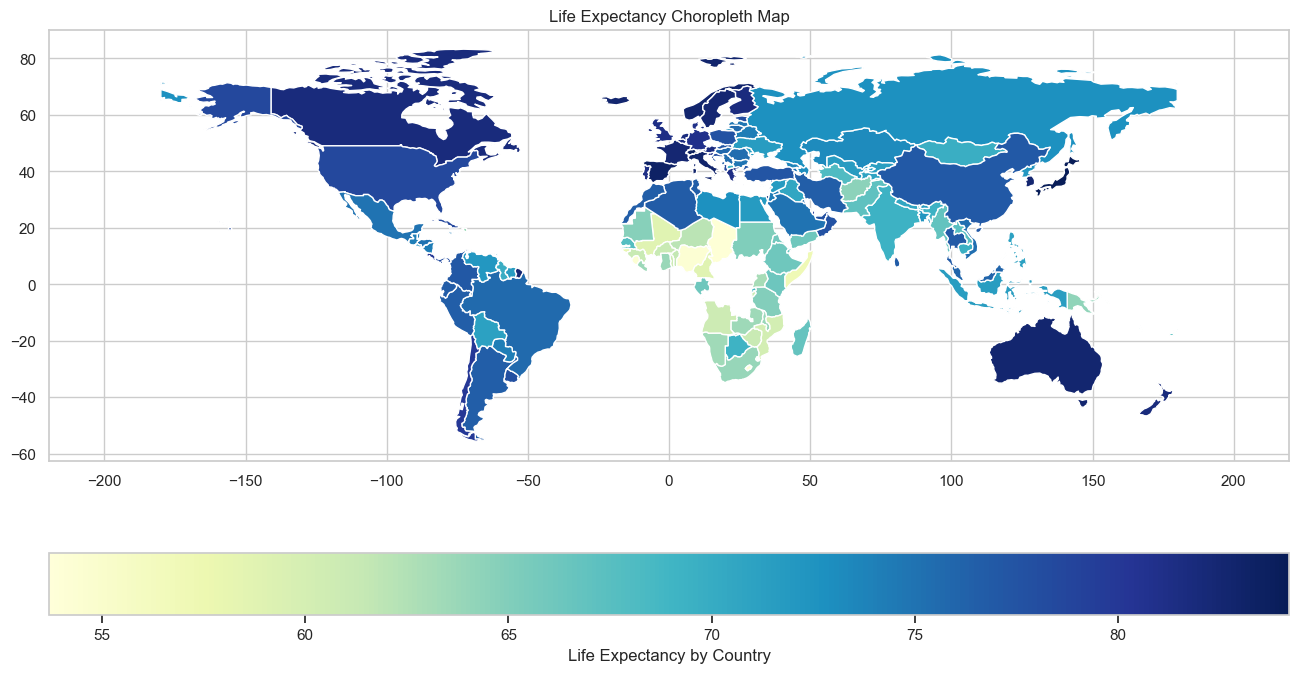

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged_df = world.merge(df, left_on='name', right_on='Country')

plt.figure(figsize=(16, 8))  
ax = plt.gca()  
merged_df.plot(ax=ax, column='Life expectancy', cmap='YlGnBu', legend=True,
               legend_kwds={'label': "Life Expectancy by Country",
                            'orientation': "horizontal"})
plt.title('Life Expectancy Choropleth Map')

ax.set_aspect('equal', adjustable='datalim') 

###   Analyze GDP Distribution and Tax Revenue

We'll create a  visualization to see  the relationship between GDP and tax revenue.

C:\Users\MSI i5\AppData\Local\Temp\ipykernel_4008\2656286444.py:12: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


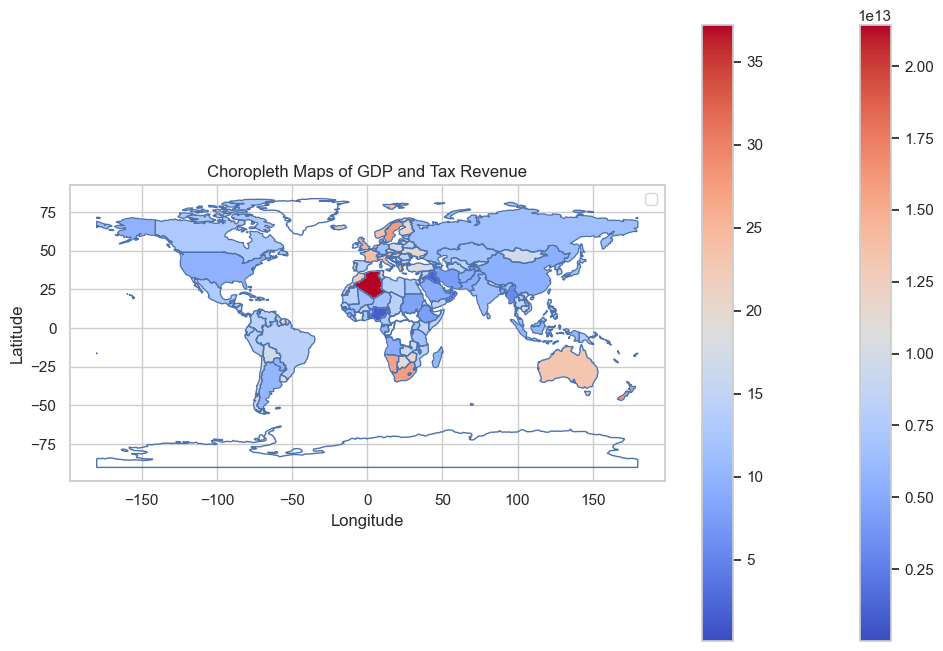

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))

world.boundary.plot(ax=ax, linewidth=1)

gdp_plot = merged_df.plot(column='GDP', cmap='coolwarm', ax=ax, legend=True, label="GDP (USD)")

tax_revenue_plot = merged_df.plot(column='Tax revenue (%)', cmap='coolwarm', ax=ax, legend=True, label="Tax revenue (%)")

plt.title('Choropleth Maps of GDP and Tax Revenue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

###  Analyze Birth Rate, Fertility Rate, and GDP
Let's use the  Plotly Express to create an interactive scatter plot that showcases the relationship between birth rate and fertility rate. The size of each marker will correspond to the GDP of the respective country. Hovering over a marker will reveal the name of the country, allowing for easy identification. This dynamic visualization provides insights into how birth rate and fertility rate relate to each other, taking GDP into account.

In [15]:
marker_sizes = df['GDP'] / df['GDP'].max() * 150

fig = px.scatter(df, x='Birth Rate', y='Fertility Rate', size='GDP',
                 hover_name='Country', size_max=100,
                 labels={'Birth Rate': 'Birth Rate', 'Fertility Rate': 'Fertility Rate'},
                 title='Birth Rate vs Fertility Rate with GDP Perspective')

fig.update_traces(marker=dict(opacity=0.7))
fig.update_layout(xaxis=dict(range=[5.5, 13]), yaxis=dict(range=[0.5, 3]))
fig.show()

### How does Life Expectancy vary with GDP?
We will create a scatter plot to visualize the relationship between Life Expectancy and GDP.

In [16]:
fig = px.scatter(df, x='Birth Rate', y='Fertility Rate', size='GDP', color='GDP',
                 hover_name='Country', size_max=100, log_x=True, log_y=True,
                 labels={'Birth Rate': 'Birth Rate', 'Fertility Rate': 'Fertility Rate'},
                 title='Birth Rate vs Fertility Rate with GDP Perspective')

fig.update_traces(marker=dict(opacity=0.7))
fig.show()

### What is the distribution of Birth Rates across different regions?
We will use a geopandas to visualize the distribution of Birth Rates by countries.

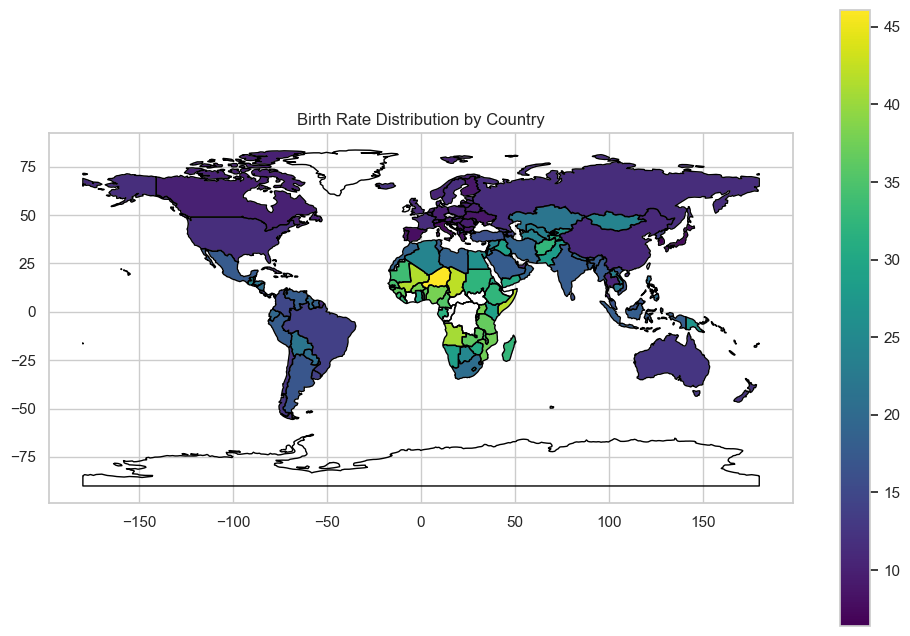

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))

world.boundary.plot(ax=ax, linewidth=1, color='black')

merged_df.plot(column='Birth Rate', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

plt.title('Birth Rate Distribution by Country')

plt.show()

### Lets see if the world is overpopulated 
We need to calculate the average density and then group the countries in 3 categories that will be used for visualization.

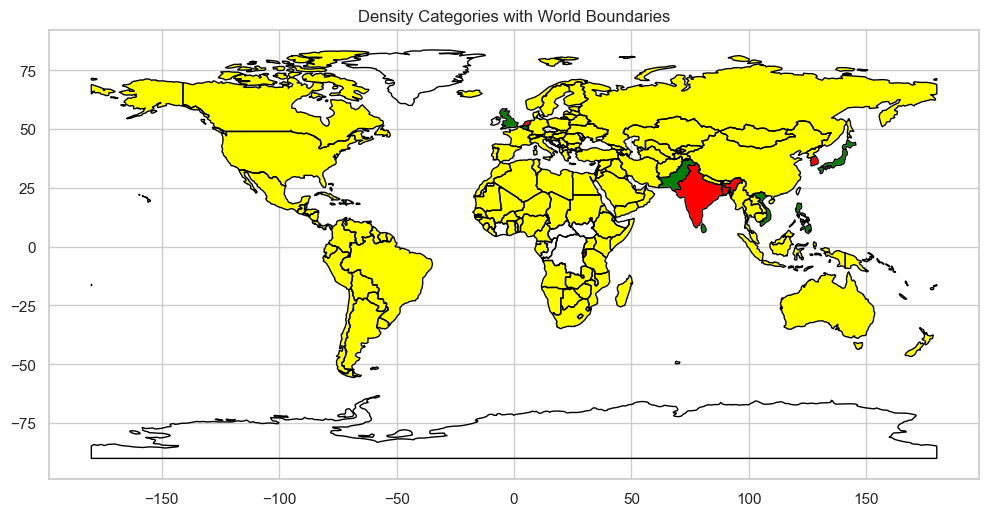

            name  Density\n(P/Km2)
61       Burundi               463
63       Lebanon               667
80   South Korea               527
82         India               464
83    Bangladesh              1265
114  Netherlands               508
145       Rwanda               525


In [18]:
mean_density = df['Density\n(P/Km2)'].mean()

merged_df["Density Category"] = "Normal Density"
merged_df.loc[merged_df['Density\n(P/Km2)'] < mean_density - 100, "Density Category"] = "Low Density"
merged_df.loc[merged_df['Density\n(P/Km2)'] > mean_density + 100, "Density Category"] = "High Density"

fig, ax = plt.subplots(figsize=(12, 8))

colors = {"Low Density": "yellow", "Normal Density": "green", "High Density": "red"}
for category, color in colors.items():
    merged_df[merged_df["Density Category"] == category].plot(ax=ax, color=color, legend=True)

world.boundary.plot(ax=ax, linewidth=1, color="black")

plt.title("Density Categories with World Boundaries")
plt.show()
overpopulated_countries = merged_df[merged_df["Density Category"] == "High Density"]
print(overpopulated_countries[['name', 'Density\n(P/Km2)']])


* From the the map we can see that most of the wolrd is not overpopulated . The countries with normal and higher density are minority as number and same as with Land area.

## Q1: What is the GDB by continents

* We need to  group by continent and calculate sum of GDP and then merge GDP data with continent geometries

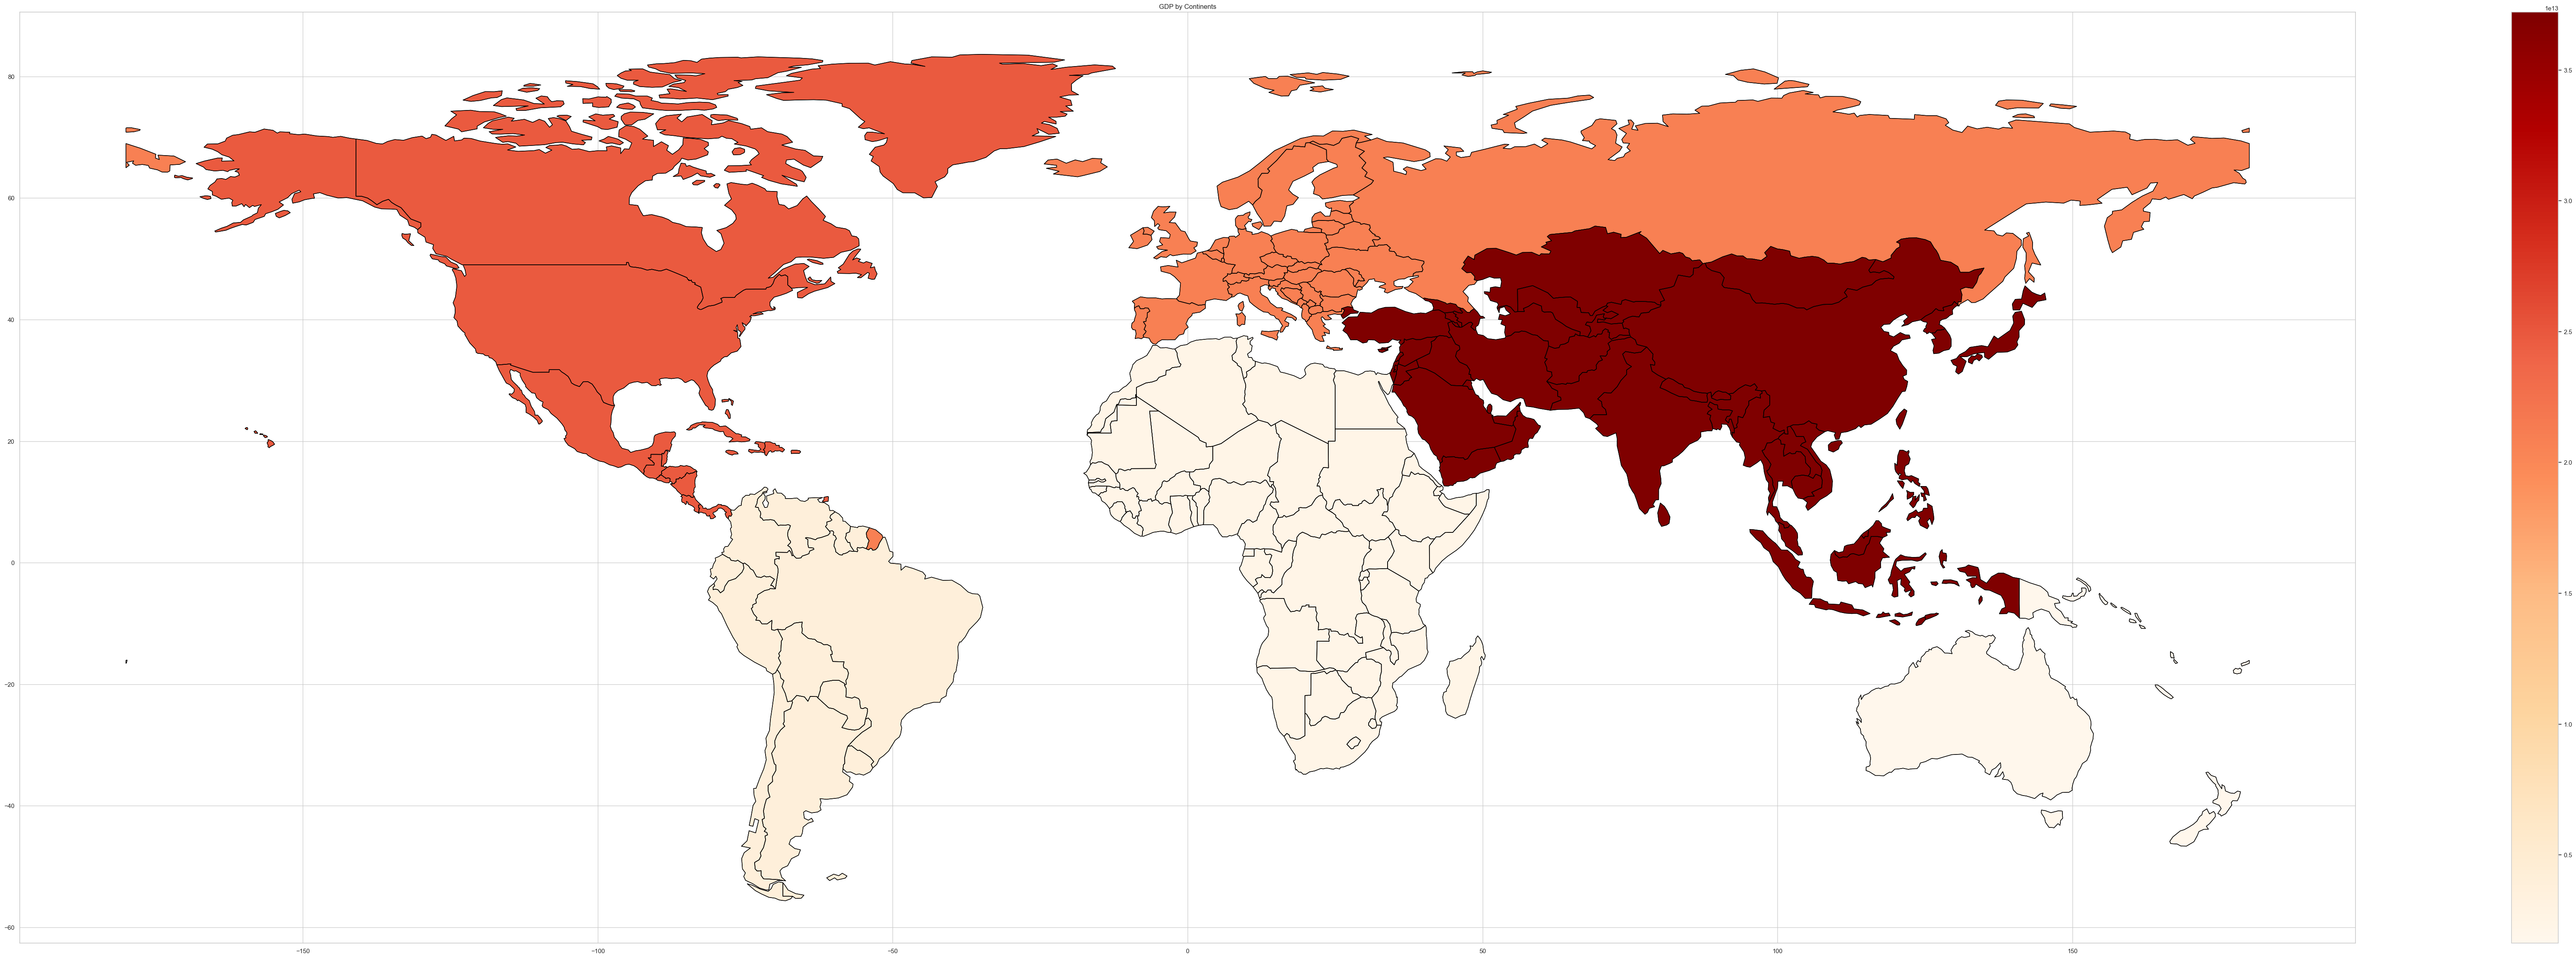

       continent           GDP
1           Asia  3.721527e+13
3  North America  2.484330e+13
2         Europe  2.090515e+13
5  South America  3.855538e+12
0         Africa  2.275490e+12
4        Oceania  1.631032e+12


In [19]:
gdp_by_continent = merged_df.groupby('continent')['GDP'].sum().reset_index()

world1 = world.merge(gdp_by_continent, left_on='continent', right_on='continent')

fig, ax = plt.subplots(figsize=(100, 30))
world1.boundary.plot(ax=ax, linewidth=1, color="black")
world1.plot(column='GDP', legend=True, ax=ax, cmap='OrRd', edgecolor='black')

ax.set_title('GDP by Continents')
plt.show()
print(gdp_by_continent.sort_values(by='GDP', ascending=False))

* The data shows that Asia has the highest GDP among the continents, with a total GDP of approximately 37.21 trillion USD.
* North America follows closely with a GDP of about 24.84 trillion USD.
* Europe ranks third in terms of GDP, with an approximate value of 20.91 trillion USD.

Among the remaining continents, South America has a GDP of approximately 3.86 trillion USD, Africa's GDP is around 2.28 trillion USD, and Oceania's GDP stands at roughly 1.63 trillion USD.

The data gives us insights into the economic output of different continents, with Asia, North America, and Europe leading in terms of GDP, followed by South America, Africa, and Oceania.

## Q2: What is the GDP per capita by continents

We already have the GDP, now we need to calculate how many people leave on each continent and then divide the GDP with this number

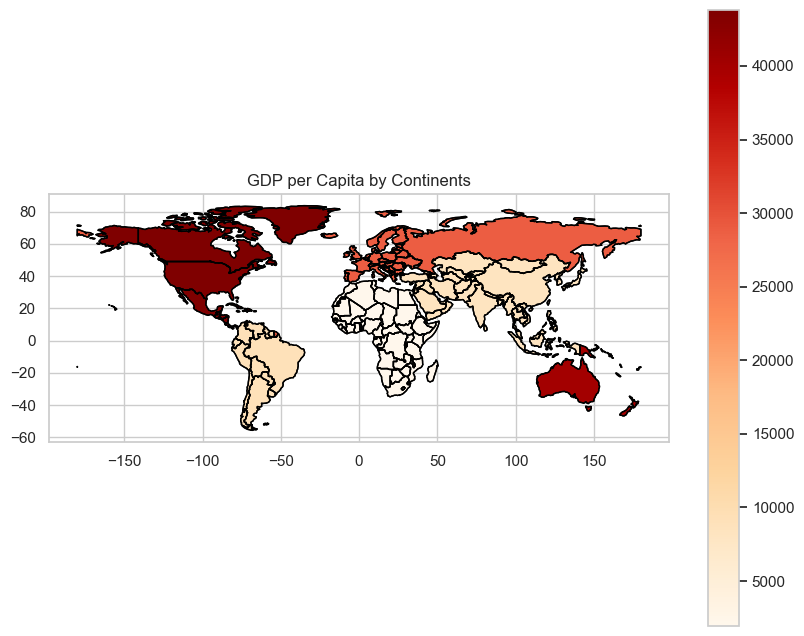

       continent           GDP    Population  GDP_per_capita
3  North America  2.484330e+13  5.672189e+08    43798.428950
4        Oceania  1.631032e+12  4.057355e+07    40199.381477
2         Europe  2.090515e+13  7.244900e+08    28854.979909
5  South America  3.855538e+12  4.285732e+08     8996.218268
1           Asia  3.721527e+13  4.524962e+09     8224.438133
0         Africa  2.275490e+12  1.168483e+09     1947.389130


In [20]:
gdp_pop_by_continent = merged_df.groupby('continent').agg({'GDP': 'sum', 'Population': 'sum'}).reset_index()
gdp_pop_by_continent['GDP_per_capita'] = gdp_pop_by_continent['GDP'] / gdp_pop_by_continent['Population']

world_with_gdp_pop = world.merge(gdp_pop_by_continent, left_on='continent', right_on='continent')

fig, ax = plt.subplots(figsize=(10, 8))
world_with_gdp_pop.boundary.plot(ax=ax, linewidth=1, color="black")
world_with_gdp_pop.plot(column='GDP_per_capita', legend=True, ax=ax, cmap='OrRd', edgecolor='black')

ax.set_title('GDP per Capita by Continents')
plt.show()

print(gdp_pop_by_continent.sort_values(by='GDP_per_capita', ascending=False))

* The table provides a comprehensive view of various continents in terms of their GDP (Gross Domestic Product), population, and GDP per capita. Each continent's economic and demographic characteristics are presented as follows:

North America:
GDP:  $24.84 trillion USD  
Population:  567.2 million people
GDP per Capita:  $43,798.43 USD

Oceania:
GDP:  $1.63 trillion USD  
Population:  40.57 million people
GDP per Capita: Approximately $40,199.38 USD

Europe:
GDP:  $20.91 trillion USD  
Population:  724.49 million people
GDP per Capita:  $28,854.98 USD

South America:
GDP:  $3.86 trillion USD  
Population:  428.57 million people
GDP per Capita:  $8,996.22 USD

Asia:
GDP:  $37.21 trillion USD  
Population:  4.52 billion people
GDP per Capita:  $8,224.44 USD

Africa:
GDP:  $2.28 trillion USD  
Population:  1.17 billion people
GDP per Capita:  $1,947.39 USD

This detailed data provides insights into the economic output, population size, and economic well-being (GDP per capita) of each continent. It's evident that Asia has the highest GDP and population, while North America exhibits the highest GDP per capita. Africa, while having a lower GDP, has the lowest GDP per capita among the continents listed.

## Q3:what is 'Life expectancy' per continent?
'Life expectancy' in this df is calculated per country. To calculate the  average life expectancy for each continent, we need to take the weighted average, where the weight is the population of each country.


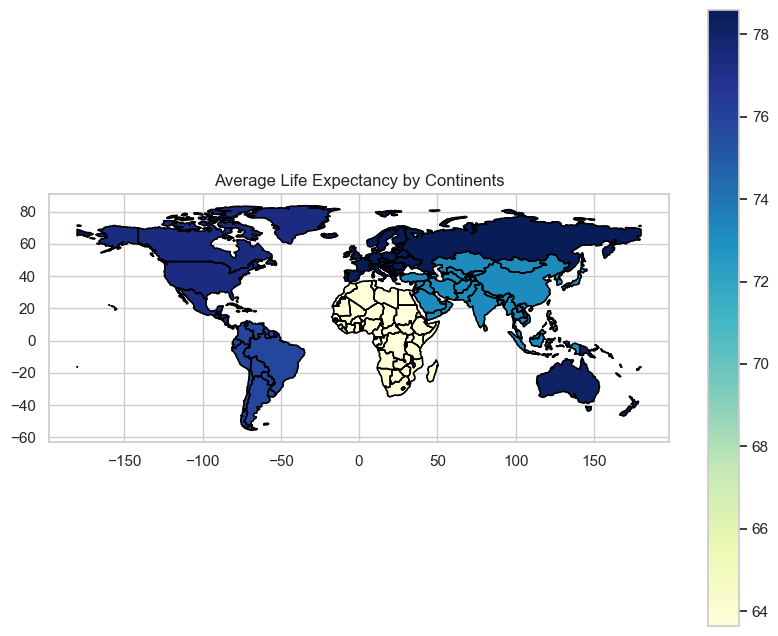

               Avg_Life_Expectancy
continent                         
Africa                   63.642647
Asia                     73.212442
Europe                   78.587828
North America            77.333299
Oceania                  78.195168
South America            75.857662


In [21]:
merged_df['Weighted_Life_Expectancy'] = merged_df['Population'] * merged_df['Life expectancy']

continent_grouped = merged_df.groupby('continent').agg(
    Sum_Weighted_LE=('Weighted_Life_Expectancy', 'sum'),
    Total_Population=('Population', 'sum')
)

continent_grouped['Avg_Life_Expectancy'] = continent_grouped['Sum_Weighted_LE'] / continent_grouped['Total_Population']

world_with_avg_life_expectancy = world.merge(continent_grouped, left_on='continent', right_index=True)

fig, ax = plt.subplots(figsize=(10, 8))
world_with_avg_life_expectancy.boundary.plot(ax=ax, linewidth=1, color="black")
world_with_avg_life_expectancy.plot(column='Avg_Life_Expectancy', legend=True, ax=ax, cmap='YlGnBu', edgecolor='black')

ax.set_title('Average Life Expectancy by Continents')
plt.show()
print(continent_grouped[['Avg_Life_Expectancy']])

* The data table presents the average life expectancy for different continents. The average life expectancy is an important indicator of the overall health and well-being of populations in each continent. The values are as follows:

Africa:
Average Life Expectancy: Approximately 63.64 years

Asia:
Average Life Expectancy: Approximately 73.21 years

Europe:
Average Life Expectancy: Approximately 78.59 years

North America:
Average Life Expectancy: Approximately 77.33 years

Oceania:
Average Life Expectancy: Approximately 78.20 years

South America:
Average Life Expectancy: Approximately 75.86 years

These values provide insights into the expected lifespan of individuals in each continent, reflecting differences in healthcare, socioeconomic conditions, and overall quality of life. Europe stands out with the highest average life expectancy, while Africa has the lowest among the continents listed.






## Q4: How many 'Physicians per thousand' we have per continent

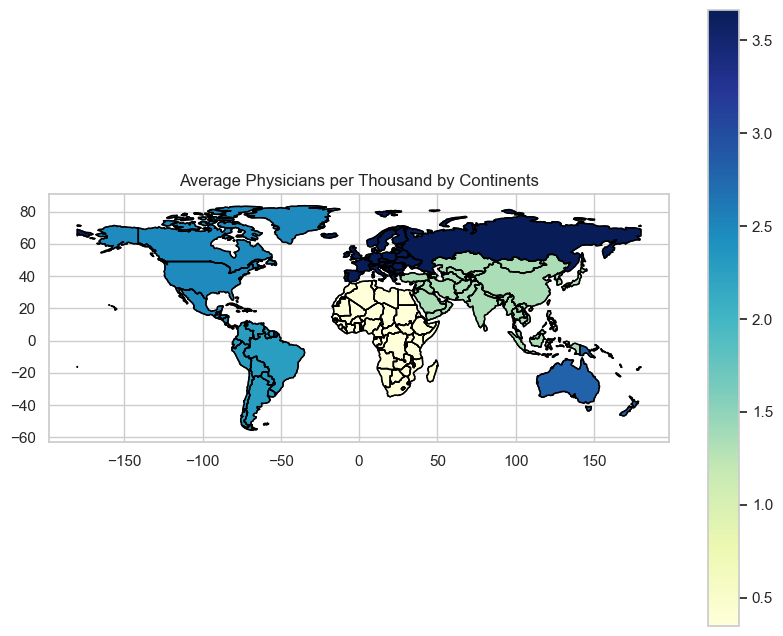

               Avg_Physicians_per_thousand
continent                                 
Africa                            0.347268
Asia                              1.340770
Europe                            3.664196
North America                     2.482174
Oceania                           2.800178
South America                     2.267744


In [23]:
merged_df['Weighted_Physicians'] = merged_df['Population'] * merged_df['Physicians per thousand']

continent_grouped_physicians = merged_df.groupby('continent').agg(
    Sum_Weighted_Physicians=('Weighted_Physicians', 'sum'),
    Total_Population=('Population', 'sum')
)

continent_grouped_physicians['Avg_Physicians_per_thousand'] = continent_grouped_physicians['Sum_Weighted_Physicians'] / continent_grouped_physicians['Total_Population']

world_with_avg_physicians = world.merge(continent_grouped_physicians, left_on='continent', right_index=True)

fig, ax = plt.subplots(figsize=(10, 8))
world_with_avg_physicians.boundary.plot(ax=ax, linewidth=1, color="black")
world_with_avg_physicians.plot(column='Avg_Physicians_per_thousand', legend=True, ax=ax, cmap='YlGnBu', edgecolor='black')

ax.set_title('Average Physicians per Thousand by Continents')
plt.show()

print(continent_grouped_physicians[['Avg_Physicians_per_thousand']])


* The data table showcases the average number of physicians available per thousand people in various continents. This metric provides insight into the healthcare resources available to the population in each continent. The values are as follows:

Africa:
Average Physicians per Thousand: Approximately 0.35

Asia:
Average Physicians per Thousand: Approximately 1.34

Europe:
Average Physicians per Thousand: Approximately 3.66

North America:
Average Physicians per Thousand: Approximately 2.48

Oceania:
Average Physicians per Thousand: Approximately 2.80

South America:
Average Physicians per Thousand: Approximately 2.27

These values offer insights into the availability of medical professionals in each continent and the level of healthcare resources relative to the population. Europe leads with the highest number of physicians per thousand people, while Africa has the lowest among the continents listed.







## Conclusion:
In this analysis, we explored various aspects of the dataset, including life expectancy, GDP, birth rate, tax revenue, and more. We created visualizations to better understand the relationships and distributions within the data. The visualizations provided insights into how different factors are correlated and how they vary across different regions and countries.

 Based on the information provided in the previous answers regarding GDP, population, GDP per capita, average life expectancy, and the number of physicians per thousand people by continent, we can draw several conclusions:

* Economic Output and Well-Being:
GDP Rankings: 
Asia has the highest GDP among the continents, followed by North America and Europe. Africa has the lowest GDP.
GDP per Capita:
North America and Oceania exhibit the highest GDP per capita, indicating higher economic well-being on an individual basis. Africa has the lowest GDP per capita.

* Population and Development:
Population Size:
Asia has the largest population among the continents, followed by Africa. Oceania has the smallest population.
Population Distribution:
Despite Africa's relatively low GDP and GDP per capita, it has a substantial population.
* Quality of Life and Healthcare:
Average Life Expectancy: Europe boasts the highest average life expectancy, reflecting generally better healthcare and living conditions. Africa has the lowest average life expectancy.
Physicians per Thousand: Europe has the highest number of physicians per thousand people, indicating a well-developed healthcare system. Africa has the lowest number of physicians per thousand people.

* Regional Disparities:
There are significant regional disparities in economic, health, and healthcare indicators across continents.
Europe consistently ranks high in terms of economic indicators, healthcare resources, and quality of life.
Africa faces challenges with lower economic output, GDP per capita, and healthcare resources, resulting in lower life expectancy.

* Correlation between Development and Healthcare:
There's a general correlation between economic development (higher GDP, GDP per capita) and better healthcare resources (higher number of physicians, higher life expectancy).

Overall, the data highlights the varying levels of development, healthcare resources, and quality of life across continents. These indicators underscore the importance of addressing disparities and investing in healthcare and economic development to improve the well-being of populations worldwide.

## Future Work:
Future work could involve more advanced analyses, such as time-series analysis to study trends over years, or machine learning techniques to predict life expectancy based on other features. Additionally, deeper explorations into the socio-economic and political factors affecting these indicators could provide a more comprehensive understanding.

## References:
* Gapminder. (n.d.). Gapminder Datasets. https://www.gapminder.org/data/
Hunter, J. D. (2007). Matplotlib: A 2D Graphics Environment. Computing in Science & Engineering, 9(3), 90-95. https://doi.org/10.1109/MCSE.2007.55

* McKinney, W. (2010). Data Structures for Statistical Computing in Python. Proceedings of the 9th Python in Science Conference, 51-56. https://doi.org/10.25080/Majora-92bf1922-00a
* https://www.kaggle.com/
* https://stackoverflow.com/
* https://pandas.pydata.org/
* https://geopandas.org/
* https://matplotlib.org/
* https://plotly.com/
